<a href="https://colab.research.google.com/github/armyekapop/data-analyst/blob/main/Stroke_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

HW2_63010798_63011090

## **Source code ของ Simple Analysis**

In [ ]:
!pip install stemgraphic

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import stemgraphic

In [ ]:
df = pd.read_csv("healthcare-dataset-stroke-data.csv")

In [ ]:
display(df)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [ ]:
df['bmi'].describe()

count    4909.000000
mean       28.893237
std         7.854067
min        10.300000
25%        23.500000
50%        28.100000
75%        33.100000
max        97.600000
Name: bmi, dtype: float64

In [ ]:
df['bmi'].median()

28.1

In [ ]:
df['bmi'].mode()

0    28.7
dtype: float64

In [ ]:
df['bmi'].var()

61.68636419426877

In [ ]:
df[['stroke', 'bmi']].groupby('stroke', as_index=False).describe()

stroke                                        bmi                       \
    count mean  std  min  25%  50%  75%  max   count       mean       std   
0  4861.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  4700.0  28.823064  7.908287   
1   249.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0   209.0  30.471292  6.329452   

                                 
    min   25%   50%   75%   max  
0  10.3  23.4  28.0  33.1  97.6  
1  16.9  26.4  29.7  33.7  56.6

In [ ]:
df[['stroke', 'bmi']].groupby('stroke', as_index=False).median()

,stroke,bmi
0,0,28.0
1,1,29.7


In [ ]:
df[['stroke', 'bmi']].groupby('stroke', as_index=False).var()

,stroke,bmi
0,0,62.541004
1,1,40.061960


In [ ]:
df['avg_glucose_level'].describe()

count    5110.000000
mean      106.147677
std        45.283560
min        55.120000
25%        77.245000
50%        91.885000
75%       114.090000
max       271.740000
Name: avg_glucose_level, dtype: float64

In [ ]:
df['avg_glucose_level'].var()

2050.600819911381

In [ ]:
df['avg_glucose_level'].median()

91.88499999999999

In [ ]:
df['avg_glucose_level'].mode()

0    93.88
dtype: float64

In [ ]:
df[['stroke', 'avg_glucose_level']].groupby('stroke', as_index=False).describe()

stroke                                    avg_glucose_level              \
    count mean  std  min  25%  50%  75%  max             count        mean   
0  4861.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0            4861.0  104.795513   
1   249.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0             249.0  132.544739   

                                                    
         std    min    25%     50%     75%     max  
0  43.846069  55.12  77.12   91.47  112.83  267.76  
1  61.921056  56.11  79.79  105.22  196.71  271.74

In [ ]:
df[['stroke', 'bmi']].groupby('stroke', as_index=False).var()

,stroke,bmi
0,0,62.541004
1,1,40.061960


In [ ]:
df[['stroke', 'avg_glucose_level']].groupby('stroke', as_index=False).var()

,stroke,avg_glucose_level
0,0,1922.477723
1,1,3834.217124


In [ ]:
df[['stroke', 'heart_disease']].groupby('stroke', as_index=False).var()

,stroke,heart_disease
0,0,0.044900
1,1,0.153744


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f8c6cfdb490>,
      dtype=object)

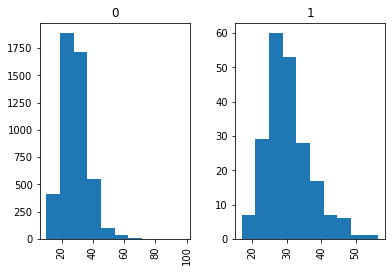

In [ ]:
df['bmi'].hist(by=df['stroke'])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f8c6ce3de10>,
      dtype=object)

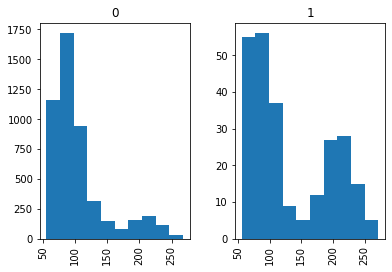

In [ ]:
df['avg_glucose_level'].hist(by=df['stroke'])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f8c6c89ec10>,
      dtype=object)

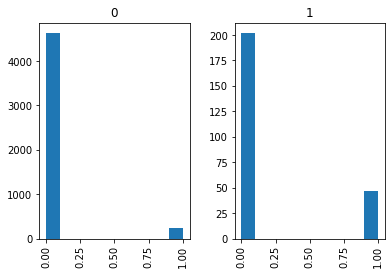

In [ ]:
df['heart_disease'].hist(by=df['stroke'])

In [ ]:
b = df[['stroke','heart_disease', 'avg_glucose_level', 'bmi']].groupby('stroke')

In [ ]:
st = b.get_group(1)
nst = b.get_group(0)

In [ ]:
display(st)

,stroke,heart_disease,avg_glucose_level,bmi
0,1,1,228.69,36.6
1,1,0,202.21,NaN
2,1,1,105.92,32.5
3,1,0,171.23,34.4
4,1,0,174.12,24.0
...,...,...,...,...
244,1,0,84.96,36.7
245,1,0,57.93,30.9
246,1,0,78.80,29.3
247,1,0,87.80,NaN


In [ ]:
display(nst)

,stroke,heart_disease,avg_glucose_level,bmi
249,0,0,95.12,18.0
250,0,0,87.96,39.2
251,0,0,110.89,17.6
252,0,0,69.04,35.9
253,0,0,161.28,19.1
...,...,...,...,...
5105,0,0,83.75,NaN
5106,0,0,125.20,40.0
5107,0,0,82.99,30.6
5108,0,0,166.29,25.6


In [ ]:
st['avg_glucose_level'].median()

105.22

In [ ]:
st['avg_glucose_level'].mode()

0    101.45
dtype: float64

In [ ]:
nst['avg_glucose_level'].mode()

0    93.88
dtype: float64

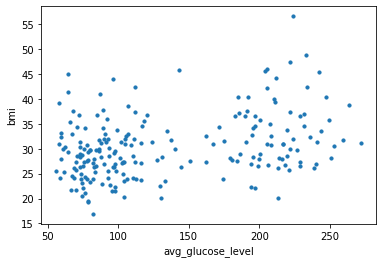

In [ ]:
st.plot.scatter(x='avg_glucose_level', y='bmi', s=10)

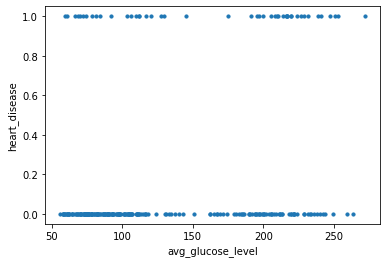

In [ ]:
st.plot.scatter(x='avg_glucose_level', y='heart_disease', s=10)

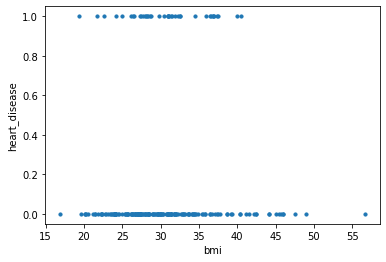

In [ ]:
st.plot.scatter(x='bmi', y='heart_disease', s=10)

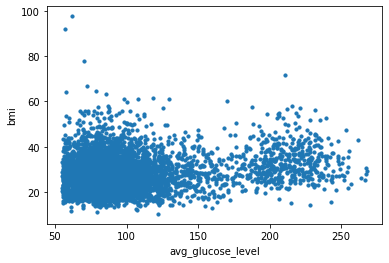

In [ ]:
nst.plot.scatter(x='avg_glucose_level', y='bmi', s=10)

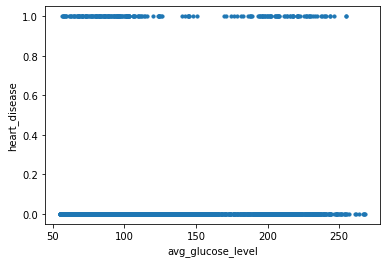

In [ ]:
nst.plot.scatter(x='avg_glucose_level', y='heart_disease', s=10)

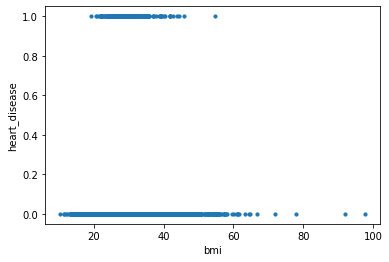

In [ ]:
nst.plot.scatter(x='bmi', y='heart_disease', s=10)

In [ ]:
st['bmi'].mode()

0    27.3
1    31.4
dtype: float64

26.4

33.7

44.650000000000006

15.449999999999992

,stroke,heart_disease,avg_glucose_level,bmi
21,1,0,233.29,48.9
66,1,0,221.58,47.5
79,1,0,143.43,45.9
113,1,0,224.10,56.6
163,1,0,203.87,45.7
176,1,0,64.44,45.0
190,1,0,205.77,46.0
196,1,0,242.52,45.5


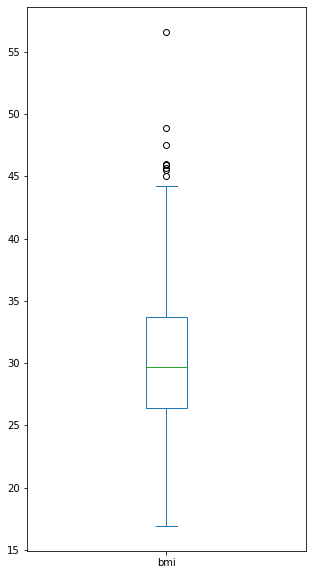

In [ ]:
st['bmi'].plot(kind = 'box',figsize = (5,10))
q1STbmi = st['bmi'].quantile(.25)
q3STbmi = st['bmi'].quantile(.75)
iqrSTbmi = q3STbmi - q1STbmi
upperSTbmi = q3STbmi + (1.5 * iqrSTbmi)
lowerSTbmi = q1STbmi - (1.5 * iqrSTbmi)
outlierSTbmiValue = (st['bmi'] < lowerSTbmi) | (st['bmi'] > upperSTbmi)
st[outlierSTbmiValue]
display(q1STbmi)
display(q3STbmi)
display(upperSTbmi)
display(lowerSTbmi)
st[outlierSTbmiValue]

372.09000000000003

-95.58999999999999

79.79

196.71

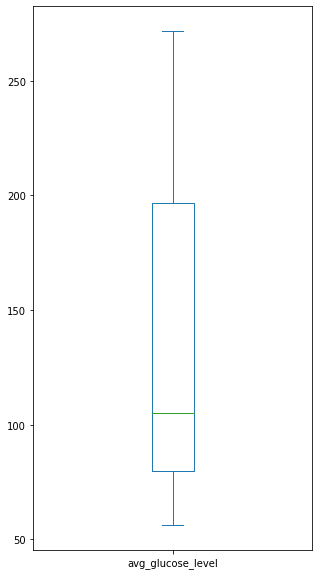

In [ ]:
st['avg_glucose_level'].plot(kind = 'box',figsize = (5,10))
q1STavg_glucose = st['avg_glucose_level'].quantile(.25)
q3STavg_glucose = st['avg_glucose_level'].quantile(.75)
iqrSTavg_glucose = q3STavg_glucose - q1STavg_glucose
upperSTavg_glucose = q3STavg_glucose + (1.5 * iqrSTavg_glucose)
lowerSTavg_glucose = q1STavg_glucose - (1.5 * iqrSTavg_glucose)
outlierSTavg_glucoseValue = (st['avg_glucose_level'] < lowerSTavg_glucose) | (st['avg_glucose_level'] > upperSTavg_glucose)
display(upperSTavg_glucose)
display(lowerSTavg_glucose)
st[outlierSTavg_glucoseValue]
display(q1STavg_glucose)
display(q3STavg_glucose)

23.4

33.1

47.650000000000006

8.849999999999994

,stroke,heart_disease,avg_glucose_level,bmi
254,0,0,210.95,50.1
258,0,0,205.84,54.6
270,0,0,129.54,60.9
333,0,0,82.24,54.7
341,0,0,75.18,48.2
...,...,...,...,...
4838,0,0,107.72,60.9
4847,0,0,84.92,47.8
4906,0,0,70.51,54.1
4952,0,0,211.83,56.6


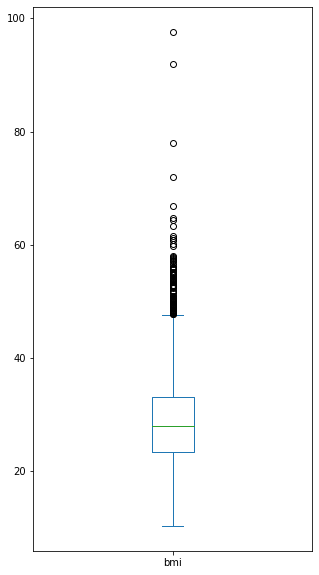

In [ ]:
nst['bmi'].plot(kind = 'box',figsize = (5,10))
q1NSTbmi = nst['bmi'].quantile(.25)
q3NSTbmi = nst['bmi'].quantile(.75)
iqrNSTbmi = q3NSTbmi - q1NSTbmi
upperNSTbmi = q3NSTbmi + (1.5 * iqrNSTbmi)
lowerNSTbmi = q1NSTbmi - (1.5 * iqrNSTbmi)
outlierNSTbmiValue = (nst['bmi'] < lowerNSTbmi) | (nst['bmi'] > upperNSTbmi)
nst[outlierNSTbmiValue]
display(q1NSTbmi)
display(q3NSTbmi)
display(upperNSTbmi)
display(lowerNSTbmi)
nst[outlierNSTbmiValue]

In [ ]:
nst['bmi'].mode()

0    28.7
dtype: float64

166.39499999999998

23.555000000000014

77.12

112.83

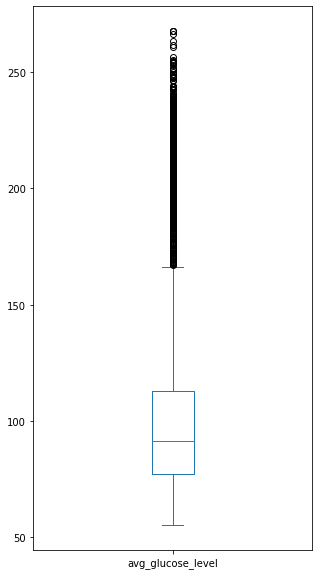

In [ ]:
nst['avg_glucose_level'].plot(kind = 'box',figsize = (5,10))
q1NSTavg_glucose = nst['avg_glucose_level'].quantile(.25)
q3NSTavg_glucose = nst['avg_glucose_level'].quantile(.75)
iqrNSTavg_glucose = q3NSTavg_glucose - q1NSTavg_glucose
upperNSTavg_glucose = q3NSTavg_glucose + (1.5 * iqrNSTavg_glucose)
lowerNSTavg_glucose = q1NSTavg_glucose - (1.5 * iqrNSTavg_glucose)
outlierNSTavg_glucoseValue = (nst['avg_glucose_level'] < lowerNSTavg_glucose) | (nst['avg_glucose_level'] > upperNSTavg_glucose)
display(upperNSTavg_glucose)
display(lowerNSTavg_glucose)
nst[outlierNSTavg_glucoseValue]
display(q1NSTavg_glucose)
display(q3NSTavg_glucose)

In [ ]:
nst[outlierNSTavg_glucoseValue]

,stroke,heart_disease,avg_glucose_level,bmi
254,0,0,210.95,50.1
256,0,1,243.53,27.0
258,0,0,205.84,54.6
272,0,0,198.21,27.3
277,0,0,206.72,26.7
...,...,...,...,...
5061,0,0,223.78,32.3
5062,0,0,211.58,36.9
5063,0,0,179.38,27.7
5064,0,0,193.88,24.3


(<Figure size 540x432 with 1 Axes>,
 <matplotlib.axes._axes.Axes at 0x7f8c6c48ca90>)

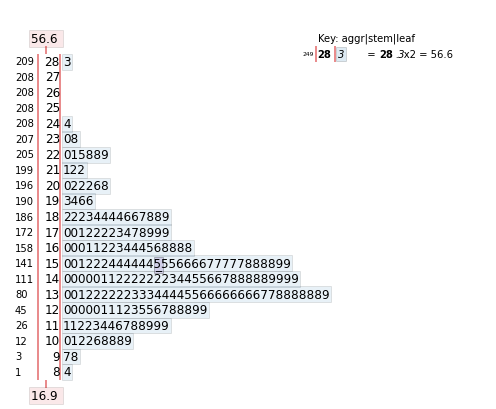

In [ ]:
leave1 = st['bmi'].values.tolist()
stemgraphic.stem_graphic(leave1, scale = 2)

(<Figure size 540x468 with 1 Axes>,
 <matplotlib.axes._axes.Axes at 0x7f8c6c236350>)

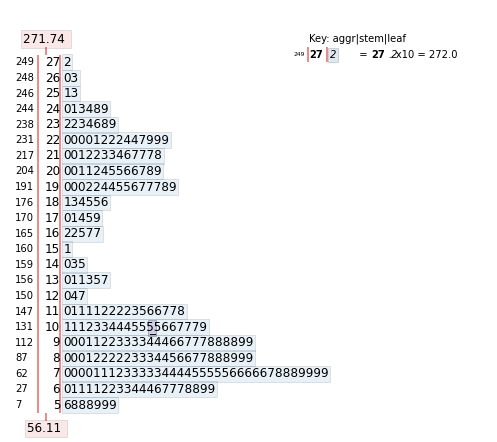

In [ ]:
leave1 = st['avg_glucose_level'].values.tolist()
stemgraphic.stem_graphic(leave1, scale = 10)

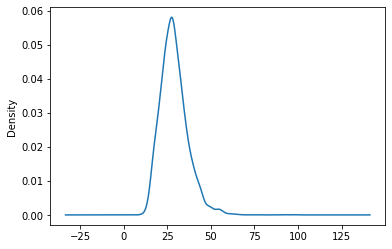

In [ ]:
df['bmi'].plot.density()

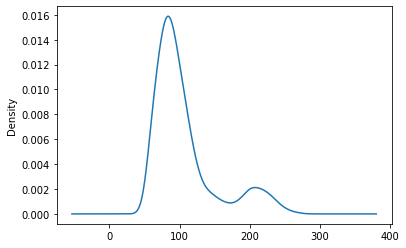

In [ ]:
df['avg_glucose_level'].plot.density()

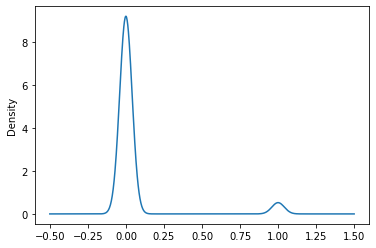

In [ ]:
df['heart_disease'].plot.density()